In [1]:
## All purpose
import pandas as pd 
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords # pip3 install gensim==3.6.0
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

     |████████████████████████████████| 125 kB 5.3 MB/s 


In [2]:
## Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Importing CSV file
df = pd.read_csv("/content/drive/MyDrive/BDSE23 第三組共享區/觀光/Dataset/Datafiniti_Hotel_Reviews.csv")

## Applying Compund score
polarity_scores = df["reviews.text"].astype("str").apply(compound_score)
df["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)

In [6]:
## Saving preprocessed file 
df.to_csv("Datafiniti_Hotel-rating-sentiments.csv",index=False)
df.Sentiment.value_counts()

Positive    8857
Neutral      770
Negative     373
Name: Sentiment, dtype: int64

In [7]:
# Importing the Datafiniti_Hotel_Reviews Dataset
data=pd.read_csv('Datafiniti_Hotel-rating-sentiments.csv')

# Having a look at the data
data.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,Sentiment_Score,Sentiment
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,2018-01-01T00:00:00.000Z,NaN,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...,0.8271,Positive
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-04-02T00:00:00Z,NaN,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,0.2892,Neutral
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-01-06T00:00:00Z,NaN,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,-0.0772,Neutral
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-08-22T00:00:00Z,NaN,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,0.9232,Positive
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-03-21T00:00:00Z,NaN,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,-0.8089,Negative


In [8]:
data.isna().sum()

id                          0
dateAdded                   0
dateUpdated                 0
address                     0
categories                  0
primaryCategories           0
city                        0
country                     0
keys                        0
latitude                    0
longitude                   0
name                        0
postalCode                  0
province                    0
reviews.date                0
reviews.dateAdded       10000
reviews.dateSeen            0
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title               1
reviews.userCity            0
reviews.userProvince        2
reviews.username            0
sourceURLs                  0
websites                    0
Sentiment_Score             0
Sentiment                   0
dtype: int64

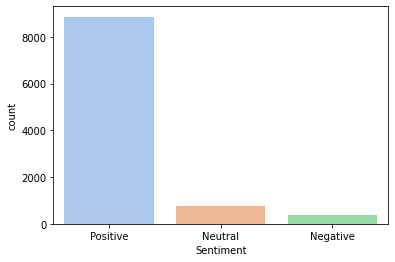

In [9]:
sns.countplot(data=data,x="Sentiment",palette="pastel");

In [14]:
# Preparing data for visualization 
Viz_1 = data[['reviews.rating','Sentiment']].value_counts().rename_axis(['reviews.rating','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph 
fig = px.bar(x=Viz_1['reviews.rating'], y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

In [15]:
#Viz2 Data preparation 
Viz_2 = data['reviews.rating'].value_counts().rename_axis(['reviews.rating']).reset_index(name='counts')
    
# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2['reviews.rating'], title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

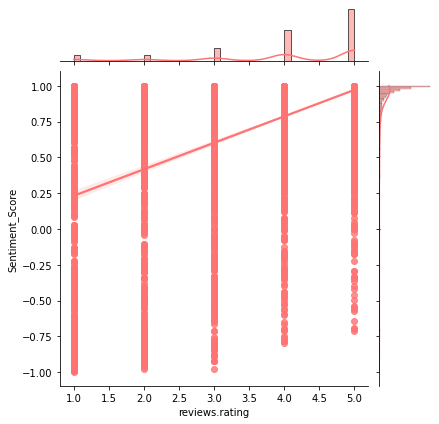

In [16]:
# Jointplot on the basis of Rating and Sentiment Score of the data
jp = sns.jointplot(data=data,x='reviews.rating',y='Sentiment_Score',kind="reg",color='#ff7373')
# jp.fig.suptitle('Jointplot on the basis of Rating and Sentiment Score of the data',fontsize=20);

In [17]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=data['reviews.rating'][data['reviews.rating'] == rating],
                            y=data['Sentiment_Score'][data['reviews.rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,
        
    )
)
fig.show()

In [18]:
data.tail()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,Sentiment_Score,Sentiment
9995,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,23666,VA,2015-12-24T00:00:00Z,NaN,"2016-03-16T00:00:00Z,2016-04-03T00:00:00Z",4,http://www.tripadvisor.com/Hotel_Review-g57804...,My friends and I took a trip to Hampton for th...,Very accommodating and friendly staff!,Wallingford,CT,Tiffany1017,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,0.4767,Neutral
9996,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,23666,VA,2015-11-17T00:00:00Z,NaN,2016-04-03T00:00:00Z,5,http://www.tripadvisor.com/Hotel_Review-g57804...,"from check in to departure, staff is friendly,...","comfortable, friendly, clean, professional",Homer,AK,bobg187,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,0.9600,Positive
9997,AVwdatg0ByjofQCxo5S5,2017-04-14T05:04:33Z,2018-12-02T13:36:35Z,3101 Coliseum Dr,"Hotels,Hotels and motels,Corporate Lodging,New...",Accommodation & Food Services,Hampton,US,us/va/hampton/3101coliseumdr/-1319580369,37.057650,-76.393310,Hampton Inn Hampton-newport News,23666,VA,2016-07-06T00:00:00Z,NaN,2016-10-24T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g5780...,This Hampton is located on a quiet street acro...,Great location,Conway,AR,K261ANbrendah,https://www.tripadvisor.com/Hotel_Review-g5780...,https://ad.doubleclick.net/ddm/clk/317271033;1...,0.8735,Positive
9998,AV1thTgM3-Khe5l_OvT5,2017-07-23T03:37:13Z,2018-12-02T00:27:00Z,7886 Main Street,"Hotels,Bar,Hotel,Restaurants",Accommodation & Food Services,Hunter,US,us/ny/hunter/7886mainstreet/-435384771,42.210915,-74.215309,Roseberry's Inn,12442,NY,2016-10-26T00:00:00.000Z,NaN,"2018-01-03T00:00:00Z,2017-12-17T00:00:00Z,2017...",5,https://www.tripadvisor.com/Hotel_Review-g4793...,Awesome wings (my favorite was garlic parmesan...,Great Atmosphere!,Hunter,NewYork,soccerrocks2016,https://www.bbb.org/us/ny/hunter/profile/hotel...,http://www.roseberrysinnhunter.com/,0.9448,Positive
9999,AV1tg9C7a4HuVbed8XA5,2017-07-23T03:35:41Z,2018-12-01T21:24:24Z,3505 S Main St,"Hotels,Hotels and motels,Corporate Lodging,Lod...",Accommodation & Food Services,Lindale,US,us/tx/lindale/3505smainst/-147603681,32.469540,-95.390420,Hampton Inn-lindale/tyler,75771,TX,2017-06-29T00:00:00.000Z,NaN,2017-07-14T00:00:00Z,4,http://tripadvisor.com/Hotel_Review-g56167-d22...,Clean facility just off freeway ..... staff fr...,Health care appointments,Fort Worth,Texas,tootallsmith,https://www.yellowpages.com/lindale-tx/mip/ham...,http://hamptoninn3.hilton.com/en/hotels/texas/...,0.9231,Positive


In [ ]:
def processString(txt): # https://www.delftstack.com/zh-tw/howto/python/python-replace-multiple-characters/
    specialChars = "!#$%^&*()/|," 
    for specialChar in specialChars:
        txt = txt.replace(specialChar, '')
        txt = txt.replace(' ', '')
        txt = txt.replace('\t', '')
        txt = txt.replace('\n', '')
        #print(txt)
    return(txt)

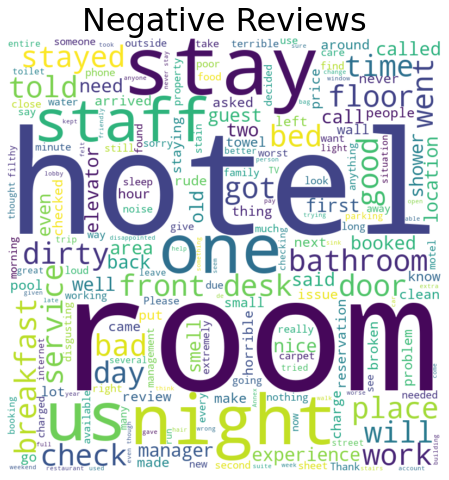

In [20]:
text1 =''
Sentiment='Negative' # In original article, he used deepnote tool to change datatype.
for i in data[data['Sentiment']==str(Sentiment)]['reviews.text'].values: 
    text1+=i + ' '
    
wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True,)
wc.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(Sentiment+' Reviews',fontsize=32);

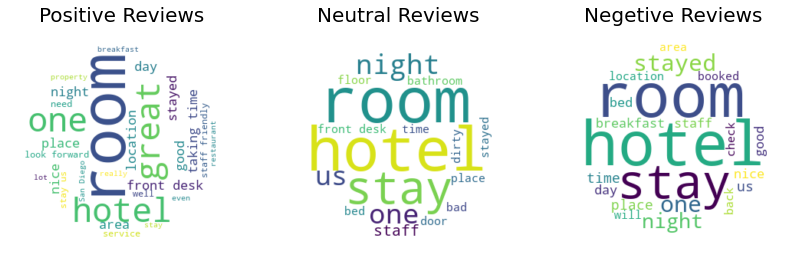

In [21]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in data[data['Sentiment']=='Positive']['reviews.text'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in data[data['Sentiment']=='Negative']['reviews.text'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in data[data['Sentiment']=='Neutral']['reviews.text'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negetive Reviews',fontsize=20);

plt.show()

In [ ]:
input_1="We were together with some friends at the Anewandter Hof. We took all 4 apartments, which enabled us privacy & piece. Apartments are fully equiped. Free use of sauna & whirlpool in the hotel was a bonus. Every morning there is a fresh bread waiting for us at the door. Great atmosphere, hospitable family Mairl and affordable price."

In [ ]:
keywords(input_1).split("\n") # Need to modify.

['piece', 'bread', 'free', 'equiped']

In [22]:
data["keywords"] = data["reviews.text"].apply(keywords)
data["keywords"] = data["keywords"].astype("str").str.replace('\n',',',) 

In [23]:
words = []
for x in data.keywords.values:
    x=x.split(",")
    for i in x:
        words.append(i)

In [24]:
from collections import Counter
word_counter = Counter(words)

In [25]:
word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])

In [26]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:19]
word_df.head(10)

,keyword,count
43,hotel,1270
7,room,1082
29,great,952
8,rooms,647
38,stay,633
41,staff,556
39,good,504
225,breakfast,486
5,location,426
186,nice,405


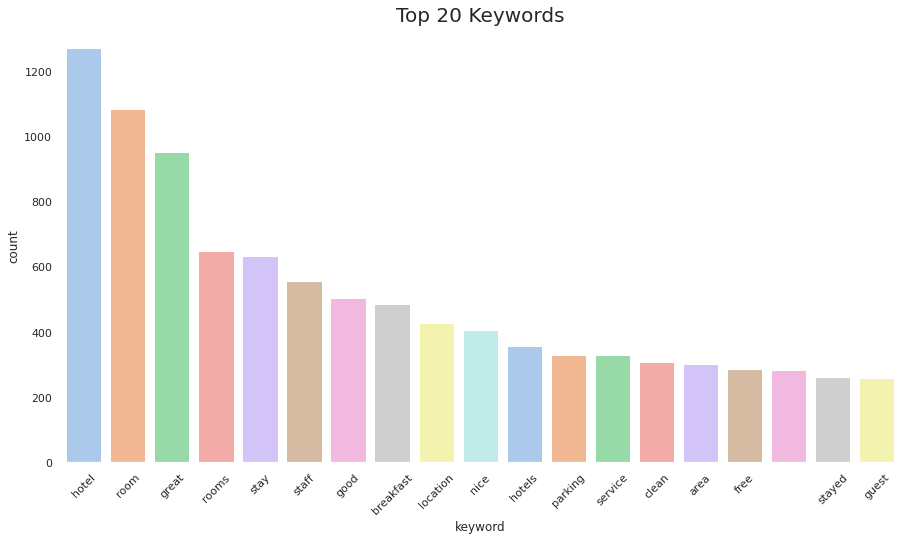

In [27]:
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=top_20,x="keyword",y="count",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [31]:
top5 = ["hotel","room","rooms","hotels"]
for x in top5:
    data["reviews.text"] = data["reviews.text"].astype(str).str.replace(x,"")

In [32]:
data.head(2)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,Sentiment_Score,Sentiment,keywords,Review
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,2018-01-01T00:00:00.000Z,NaN,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...,0.8271,Positive,train track,"This hotel was nice and quiet. Did not know, t..."
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-04-02T00:00:00Z,NaN,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,0.2892,Neutral,"bed,king",We stayed in the king suite with the separatio...


In [33]:
data2=data.copy()
      
def removing_stop_words(txt):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(txt) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
     
    return filtered_sentence
    
data2["reviews.text"] = data2["reviews.text"].apply(removing_stop_words)

In [34]:
# Making a function to lemmatize 
lemmatizer = WordNetLemmatizer() 
def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n')
        x=lemmatizer.lemmatize(j,pos='v')
        x=lemmatizer.lemmatize(j,pos='a')
        x=lemmatizer.lemmatize(j,pos='r')
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


data2["reviews.text"] = data2["reviews.text"].apply(lemmatize)

In [35]:
data2["reviews.text"] = data2["reviews.text"].apply(lambda x:" ".join(token for token in x))

In [36]:
data2.head(2)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites,Sentiment_Score,Sentiment,keywords,Review
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,-119.81979,Best Western Plus South Coast Inn,93117,CA,2018-01-01T00:00:00.000Z,NaN,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel nice quiet . Did know , train track...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...,0.8271,Positive,train track,"This hotel was nice and quiet. Did not know, t..."
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,-121.92194,Best Western Carmel's Town House Lodge,93921,CA,2016-04-02T00:00:00Z,NaN,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed king suite separation bedroom living...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com,0.2892,Neutral,"bed,king",We stayed in the king suite with the separatio...


In [37]:
X = data2["reviews.text"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

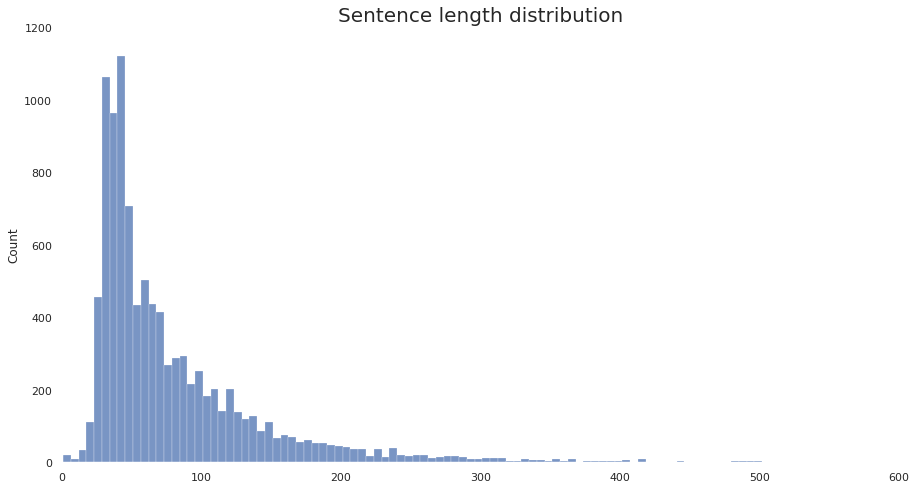

In [38]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

In [39]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 20999
max length of sentence: 1507


In [40]:
# Padding the reviews [Pads sequences to the same length.]
X = pad_sequences(X, padding='post', maxlen=600)

In [41]:
labels = ['1', '2', '3', '4', '5']
          
y = data['reviews.rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

In [55]:
embedding_dim =16
EPOCHS = 5
BATCH_SIZE = 125
units = 76
val_split = 0.12

In [56]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

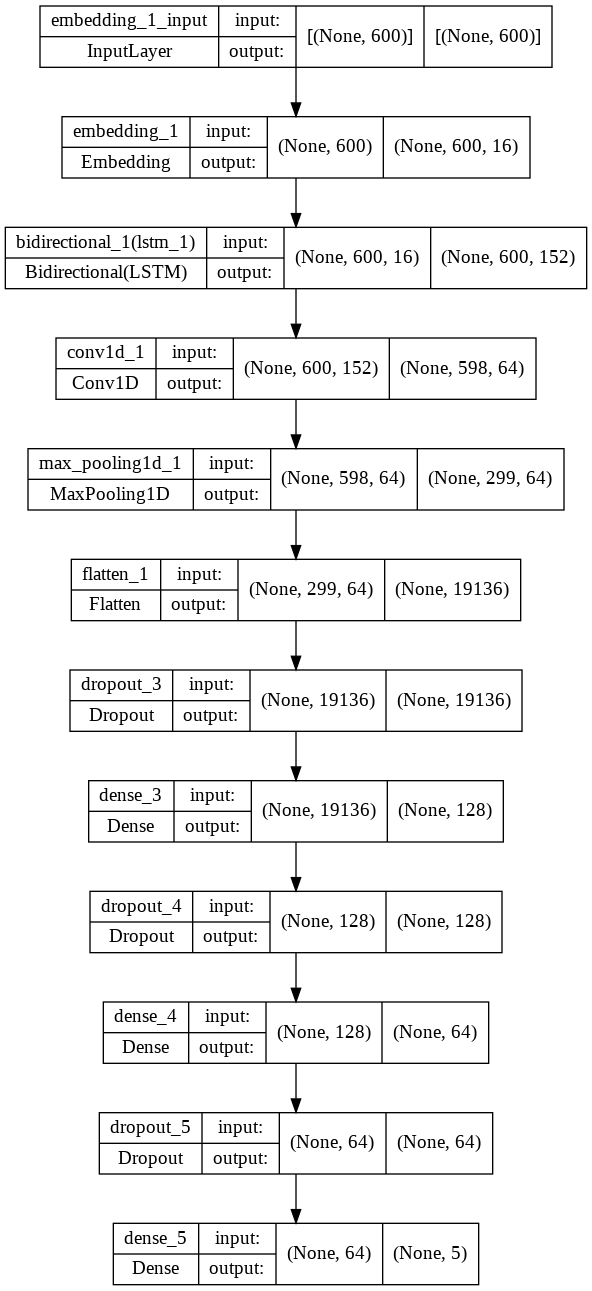

In [57]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) # You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [58]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

In [59]:
history = model.fit(X_train, y_train, epochs=int(EPOCHS), validation_split=float(val_split), batch_size=int(BATCH_SIZE), verbose=2)

Epoch 1/5
64/64 - 20s - loss: 1.2802 - accuracy: 0.4635 - val_loss: 1.0493 - val_accuracy: 0.5176 - 20s/epoch - 309ms/step
Epoch 2/5
64/64 - 13s - loss: 0.9829 - accuracy: 0.5414 - val_loss: 0.9187 - val_accuracy: 0.5796 - 13s/epoch - 204ms/step
Epoch 3/5
64/64 - 13s - loss: 0.8139 - accuracy: 0.6354 - val_loss: 0.8890 - val_accuracy: 0.5852 - 13s/epoch - 206ms/step
Epoch 4/5
64/64 - 13s - loss: 0.6689 - accuracy: 0.7155 - val_loss: 0.9909 - val_accuracy: 0.6102 - 13s/epoch - 207ms/step
Epoch 5/5
64/64 - 13s - loss: 0.5392 - accuracy: 0.7817 - val_loss: 1.1094 - val_accuracy: 0.6167 - 13s/epoch - 206ms/step


In [60]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

array([3, 3, 2, 4, 2, 4, 3, 2, 4, 4, 3, 4, 2, 4, 3, 4, 4, 3, 4, 3, 4, 2,
       0, 3, 4, 3, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 3, 2, 4, 3, 4, 4, 4, 0,
       3, 2, 4, 4, 3, 0, 4, 3, 3, 4, 0, 3, 4, 2, 4, 1, 4, 4, 2, 0, 4, 4,
       4, 4, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 0, 2, 0, 3, 4, 4, 4,
       4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 3, 4, 4, 0, 4, 3, 3, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 4, 0, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 2, 0,
       4, 2, 4, 4, 4, 2, 0, 4, 4, 2, 3, 3, 3, 3, 4, 3, 2, 4, 4, 4, 4, 2,
       3, 2, 4, 0, 4, 2, 4, 4, 4, 4, 0, 3, 3, 4, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 0, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 4,
       3, 0, 4, 4, 4, 4, 2, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 2, 4, 2, 3,
       4, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 3, 0, 4, 4, 4, 3, 0, 4, 4, 4, 4, 2, 3, 2, 4, 3, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 1, 4, 4, 2, 4, 4,
       2, 3, 0, 2, 0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,

In [61]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(pred_final, y_test)*100),2))

Accuracy: 62%


In [62]:
from sklearn.metrics import mean_squared_error
print("Root mean square error: {}".format(round(np.sqrt(mean_squared_error(pred_final,y_test)),3)))

Root mean square error: 0.88


In [63]:
model.save("Ds_BiLSTM_2.h5")

In [64]:
new_model = tf.keras.models.load_model('Ds_BiLSTM_2.h5')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 16)           335984    
                                                                 
 bidirectional_1 (Bidirectio  (None, 600, 152)         56544     
 nal)                                                            
                                                                 
 conv1d_1 (Conv1D)           (None, 598, 64)           29248     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 299, 64)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 19136)             0         
                                                                 
 dropout_3 (Dropout)         (None, 19136)            